In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


[Text(0, 0.5, 'REAL GDP')]

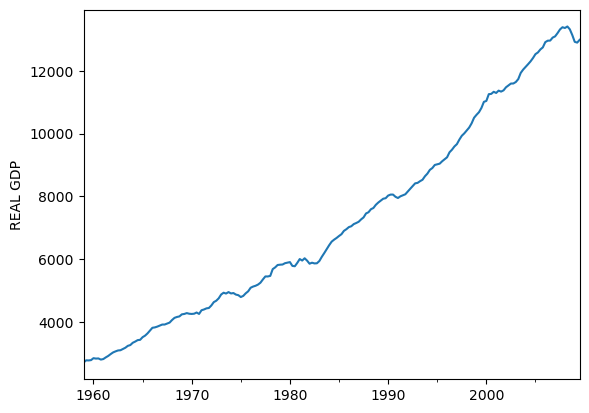

In [20]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP')

In [21]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [22]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [23]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [29]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

In [31]:
type(gdp_cycle)

pandas.core.series.Series

In [34]:
df['trend']=gdp_trend

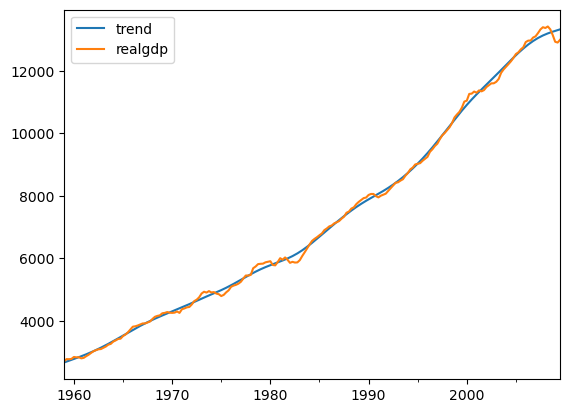

In [37]:
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True)

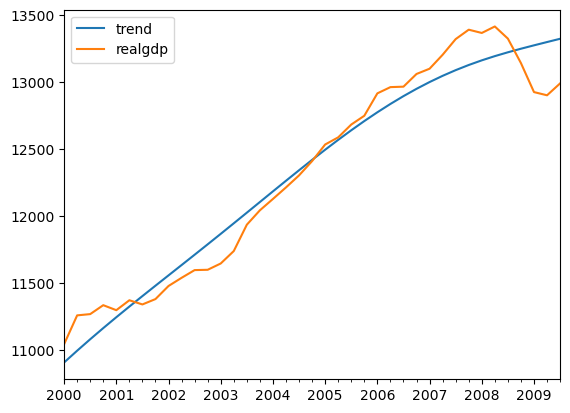

In [40]:
df[['trend','realgdp']]['2000-03-31':].plot().autoscale(axis='x',tight=True)